# Energy Convervation
Here, we will discuss the effects of energy conservation according to Parseval's Theorem.

We find that the energy is only conserved when the number of bins used for the FFT is greater or equal than the number of samples in the time sample.

In [2]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
from internal import *

#### Generate a signal

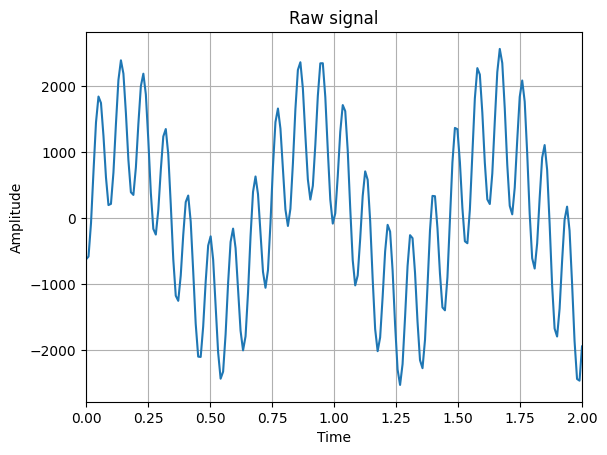

In [8]:
sr = 100;       # Hz. Sampling rate
t = 2;         # s. Duration of the signal
N = 100;      # Number of different frequencies composing the signal

f = [1.3333, 11.11111] # Hz. Main frequencies of the simulated signals
sigma_f = 0.01 # standard deviation around the frequencies chosen for the signal generation
sigma_A = 0.5 # standard deviation around the amplitudes chosen for the signal generation

F   = np.zeros(N*len(f))
A   = np.zeros(N*len(f))
phi = np.zeros(N*len(f))
k = -1 
for f0 in f:
    k += 1
    F[N*k:N*(k+1)] = generate_frequencies(N, sr=sr, f0=f0,sigma=sigma_f);
    A[N*k:N*(k+1)] = generate_amplitudes(N, sigma= sigma_A);
    phi[N*k:N*(k+1)] = generate_phase(N);

sort_ids = F.argsort()
F   = F[sort_ids]
A   = A[sort_ids]
phi = phi[sort_ids]
x, y = generate_signal(F, A, t=t, sr=sr, phi=phi);

plot.signal(x, y);


In [ ]:
window = 5.0     # s. Length of the windows in seconds
shift  = window  # s. Length of the window shift in seconds
n_bins = int(window*sr/1);  # Number of bins to use for the DFT calculation
